# Non-linear Transforms

The following shows how to implement non-linear transforms

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import nengo

In [5]:
model = nengo.Network(label="Non-Linear Transform")
with model:
    X = nengo.Ensemble(100, dimensions=1, label="X")
    Y = nengo.Ensemble(100, dimensions=1, label="Y")

    in_x = nengo.Node(np.sin)

    nengo.Connection(in_x, X)
    nengo.Connection(X, Y, function=lambda x: x**2)

    sin_probe = nengo.Probe(in_x, label="sin(t)")
    X_probe = nengo.Probe(X, label="X", synapse=0.01)
    Y_probe = nengo.Probe(Y, label="Y", synapse=0.01)


In [6]:
with nengo.Simulator(model) as sim:
    sim.run(5)

/home/tariq/miniconda3/envs/nengo-tutorials/lib/python3.13/site-packages/nengo/builder/optimizer.py:654: UserWarning: Skipping some optimization steps because SciPy is not installed. Installing SciPy may result in faster simulations.
  warnings.warn(


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(-1.2, 1.2)

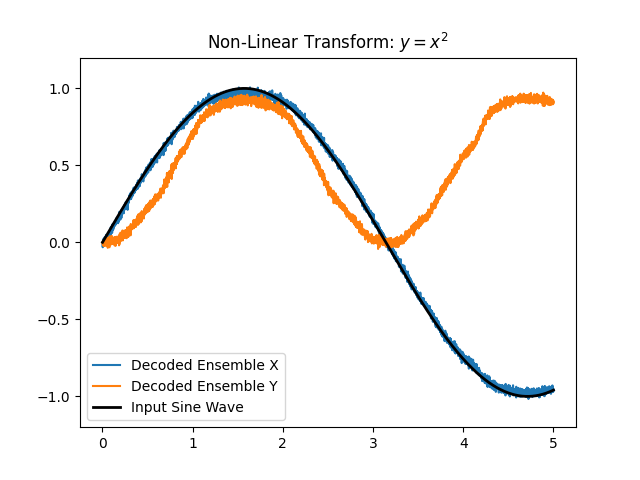

In [8]:
plt.figure()
plt.plot(sim.trange(), sim.data[X_probe], label="Decoded Ensemble X")
plt.plot(sim.trange(), sim.data[Y_probe], label="Decoded Ensemble Y")
plt.plot(
    sim.trange(), sim.data[sin_probe], label="Input Sine Wave", color="k", linewidth=2.0
)
plt.legend(loc="best")
plt.title("Non-Linear Transform: $y = x^2$")
plt.ylim(-1.2, 1.2)

# Multiplication

Non-linear transforms can still be achieved via a simple linear decoding of the encoding. E.g multiplication of two separate inputs is a non-linear transform demonstrated here. 

In [10]:
model = nengo.Network(label="Multiplying")
with model:
    X = nengo.Ensemble(100, dimensions=1, label="X")
    Y = nengo.Ensemble(100, dimensions=1, label="Y")
    combined= nengo.Ensemble(200, dimensions=2, label="Combined")
    Z = nengo.Ensemble(100, dimensions=1, label="Z")

    in_x = nengo.Node(output=0.5)
    in_y = nengo.Node(output=0.25)

    nengo.Connection(in_x, X)
    nengo.Connection(in_y, Y)
    nengo.Connection(X, combined[0])
    nengo.Connection(Y, combined[1])
    nengo.Connection(combined, Z, function=lambda x: x[0] * x[1])

    in_x_probe = nengo.Probe(in_x, label="in_x", synapse=0.01)
    in_y_probe = nengo.Probe(in_y, label="in_y", synapse=0.01)
    X_probe = nengo.Probe(X, label="X", synapse=0.01)
    Y_probe = nengo.Probe(Y, label="Y", synapse=0.01)
    Z_probe = nengo.Probe(Z, label="Z", synapse=0.01)

In [11]:
with nengo.Simulator(model) as sim:
    sim.run(5)

/home/tariq/miniconda3/envs/nengo-tutorials/lib/python3.13/site-packages/nengo/builder/optimizer.py:654: UserWarning: Skipping some optimization steps because SciPy is not installed. Installing SciPy may result in faster simulations.
  warnings.warn(


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

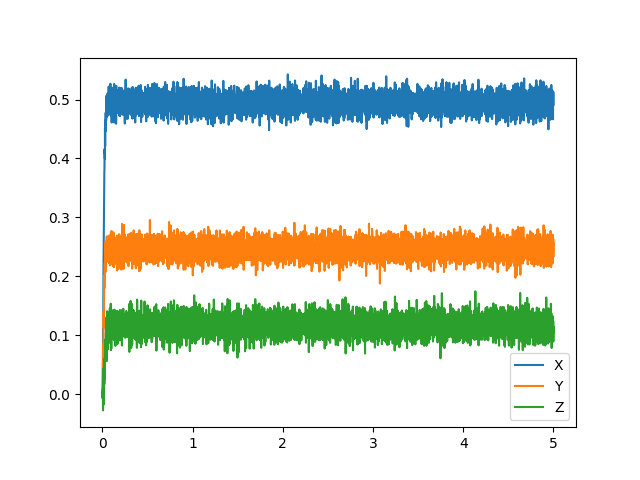

In [12]:
t = sim.trange()
plt.figure()
plt.plot(t, sim.data[X_probe], label="X")
plt.plot(t, sim.data[Y_probe], label="Y")
plt.plot(t, sim.data[Z_probe], label="Z")
plt.legend()

Extended example from docs

In [14]:
from nengo.dists import Choice
from nengo.processes import Piecewise

In [21]:
model = nengo.Network(label="Multiplying")
with model:
    X = nengo.Ensemble(100, dimensions=1, label="X", radius=10)
    Y = nengo.Ensemble(100, dimensions=1, label="Y", radius=10)
    Z = nengo.Ensemble(100, dimensions=1, label="Z", radius=100)
    # radius is approx sqrt(10^2 + 10^2)
    combined= nengo.Ensemble(200, dimensions=2, label="Combined", radius=15)

    # This next two lines make all of the encoders in the Combined population
    # point at the corners of the cube.
    # This improves the quality of the computation.
    combined.encoders = Choice([[1, 1], [-1, 1], [1, -1], [-1, -1]])

    in_x = nengo.Node(Piecewise({0: 0, 2.5: 10, 4: -10}))
    in_y = nengo.Node(Piecewise({0: 10, 1.5: 2, 3: 0, 4.5: 2}))
    correct_ans = Piecewise({0: 0, 1.5: 0, 2.5: 20, 3: 0, 4: 0, 4.5: -20})

    nengo.Connection(in_x, X)
    nengo.Connection(in_y, Y)
    nengo.Connection(X, combined[0])
    nengo.Connection(Y, combined[1])
    nengo.Connection(combined, Z, function=lambda x: x[0] * x[1])

    in_x_probe = nengo.Probe(in_x, label="in_x")
    in_y_probe = nengo.Probe(in_y, label="in_y")
    X_probe = nengo.Probe(X, label="X", synapse=0.01)
    Y_probe = nengo.Probe(Y, label="Y", synapse=0.01)
    Z_probe = nengo.Probe(Z, label="Z", synapse=0.01)


In [22]:
with nengo.Simulator(model) as sim:
    sim.run(5)

/home/tariq/miniconda3/envs/nengo-tutorials/lib/python3.13/site-packages/nengo/builder/optimizer.py:654: UserWarning: Skipping some optimization steps because SciPy is not installed. Installing SciPy may result in faster simulations.
  warnings.warn(


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(-25.0, 25.0)

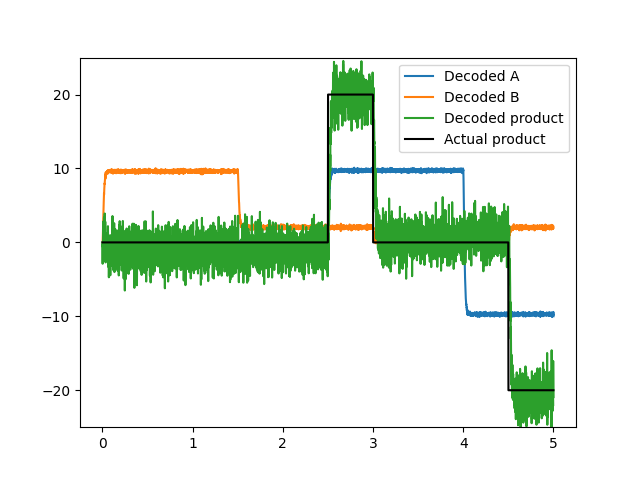

In [23]:
plt.figure()
plt.plot(sim.trange(), sim.data[X_probe], label="Decoded A")
plt.plot(sim.trange(), sim.data[Y_probe], label="Decoded B")
plt.plot(sim.trange(), sim.data[Z_probe], label="Decoded product")
plt.plot(
    sim.trange(), correct_ans.run(sim.time, dt=sim.dt), c="k", label="Actual product"
)
plt.legend(loc="best")
plt.ylim(-25, 25)